❗️ **本教程知识体系来源于**
**Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd edition**
**作者为Aurélien Géron**

**知识产权归原作者所有，如有侵权请联系删除**

# 动手做机器学习教程5 - 多种分类算法(上)
>在本节，我们会介绍监督学习的另一大应用-分类，我们先从二分类开始讲起。

## 1.二分类器
二分类器是只能将数据分为两类的分类器，也是最简单的分类器。在本篇教程中，我们会用MNIST数据集进行分类，在分类之前，我们先介绍MNIST数据集：
### (1) MNIST数据集
MNIST数据集是一个非常经典的数据集，具有60000个数据的训练集和10000个数据的测试集。MNIST数据集的内容是手写数字0-9，其主要用途是机器视觉领域的图像分类。其中每个数字已经过尺寸标准化，并以固定尺寸的图像为中心。对于想要在真实数据上尝试学习技术和模式识别方法，同时在预处理和格式化方面花费最少的人来说，它是一个很好的数据库。

OpenBayes内置了MNIST数据集，在启动容器前的“绑定数据”处搜索“MNIST”即可找到并进行绑定。我们也可以用sklearn来下载MNIST：

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [2]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

这里MNIST是一个字典，其data键包含了一数组，每一行表示一个数据，每一列表示一个特征；其target键包含了一数组，包含数据的标签。我们来查看一下MNIST的data键和target键：

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

data有70000×784个值，指的是一共有70000个数据，每个数据有784个特征。事实上，其特征指的是每个数据都是一张28×28像素的图片，每一个像素点都是一个特征，特征的值为像素点的强度(intensity)，从0(白)到255(黑)。

我们可以将这784个特征转化为28×28的数组，然后用imshow()来将其展现出来：

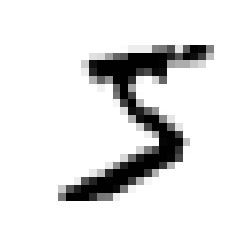

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

这个数字看起来像是5，我们查看一下它的标签(MNIST的标签值为这个数字的真实值)：

In [6]:
y[0]

'5'

这个数字确实是5，由于标签是字符串，而我们的算法需要作用于数字，我们将所有的标签都转化为数字：

In [7]:
y = y.astype(np.uint8)

在开头我们已经说过了：MNIST有60000数据的训练集和10000个数据的测试集。MNIST已经将所有的数据打乱，并将前60000个数据作为其训练集，后10000个数据作为其测试集：

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### (2) 用SGDClassifier进行二分类
SGDClassifier是依据随机梯度下降(在第4篇教程中提到)算法而实行分类的分类器，它能够处理很大型的数据集。接下来我们创建一个用来分辨数字是否是“5”的二分类器，其输出为**True**(指其认为输入的数字是5)和**False**(认为输入的数字不是5)。

为了训练和测试，我们将实际上是“5”的数字都筛选出来：

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

我们接下来便可以进行训练和预测了(注意：在预测时我们只能输入**reshape后**的数据，若输入如“X[0]”则无法预测)：

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

## 2.常见的性能度量方法
### (1) 交叉验证
我们先尝试用3折交叉验证进行评分，评分标准为"accuracy"，即准确率(正确预测的比率)：

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96355, 0.93795, 0.95615])

我们的准确率都在93%以上，这是否代表我们的分类器效果很好呢？

我们在下面创造一个只会将所有数据都判定为“非5”的分类器，并对其进行评分：

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

可以看到，准确率都在90%以上。这是因为数据集中“5”只占10%左右，所以即使我们判断每个数字都不是“5”，我们的准确率也在90%左右；若数据集中的“5”更少，我们的准确率看起来也会更高。

因此**用准确率来进行评定通常是不严谨的**，我们需要找其他的性能度量。

### (2) 混淆矩阵、 精确率、召回率、F1值
混淆矩阵(Confusion Matrix)的每一行代表了数据的真实类别，每一列代表数据的预测类别。即$a_{ij}$代表本属于第$i$类但被判为第$j$类的数据个数。

我们可以先对数据进行交叉验证的预测，再计算其混淆矩阵：

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53057,  1522],
       [ 1325,  4096]], dtype=int64)

这个混淆矩阵中，“阳性(positive)”代表本身“非5”，“阴性(negative)”代表本身是“5”。

$a_{11}$代表本来不是“5”且被成功判定为“非5”的数据个数(true postive, TP, 真阳性)，$a_{12}$代表本来不是“5”但被错误地判定为“5”的数据个数(false positive, FP, 假阳性)，$a_{21}$代表本来是“5”且被错误地判定为“非5”的数据个数(false negative, FN, 假阴性)，$a_{22}$代表本来是“5”且被成功判定为“5”的数据个数(true negative, TN, 真阴性)。

接下来我们引入三个值：精确率(precision)、召回率(recall)、F1值(F1 value)，来对我们的模型进行评价：

$$精确率 = \frac{TP}{TP + FP}$$

$$召回率 = \frac{TP}{TP + FN}$$

$$F_{1} = \frac{2}{\frac{1}{精确率} + \frac{1}{召回率}} = \frac{TP}{TP + \frac{FN + FP}{2}}$$

由定义可知，精确率为**本身**为“非5”的数据中判定正确的比例，召回率为为**判定**为“非5”的数据中判定正确的比例，F1值为精确率和召回率的调和平均数（因此只有当精确率和召回率都高时，F1值才会比较高）。

我们可以用以下的代码求出精确率、召回率和F1值：

In [15]:
from sklearn.metrics import precision_score
precision_score(y_train_5, y_train_pred)

0.7290850836596654

In [16]:
from sklearn.metrics import recall_score
recall_score(y_train_5, y_train_pred)

0.7555801512636044

In [17]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7420962043663375

我们自然希望精确率和召回率都比较高，但实际上这种情况很难达到，因为二者之间存在一种权衡(trade-off)关系。SGDClassifier如何做出分类的依据是将数据输入决策函数(decision function)后得到的分数，并且初始设定有一阈值(threshold)，如果该分数大于阈值，则将实例分配给肯定类；否则将实例分配给否定类。阈值越高，召回率一定越低，精确率通常情况越高，但也有可能下降，但总体还是会提高。

我们可以用decision_function()来得到上述的“分数”，并根据自己设定的阈值来进行预测：

In [18]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2412.53175101])

In [19]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [20]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

可以看到，不同的阈值会导致判定结果不同，我们如何根据想要达到的精确率和召回率选择阈值呢？我们可以画出**精确率和召回率关于阈值的图像**：

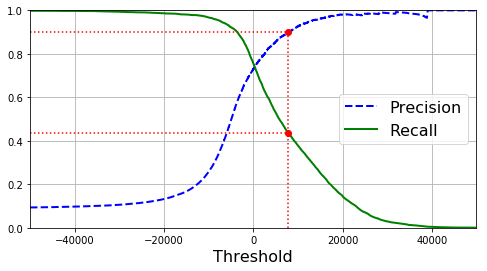

In [21]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1])            

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")
plt.show()

假设我们要求90%精确率，我们可以根据图像大体看出对应的阈值和召回率(红线)，也可以用以下的代码找出其精确值：

In [22]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

7816.1555236825225

In [23]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
recall_score(y_train_5, y_train_pred_90)

0.4368197749492714

我们也可以画出**精确率/召回率曲线(PR曲线)**：

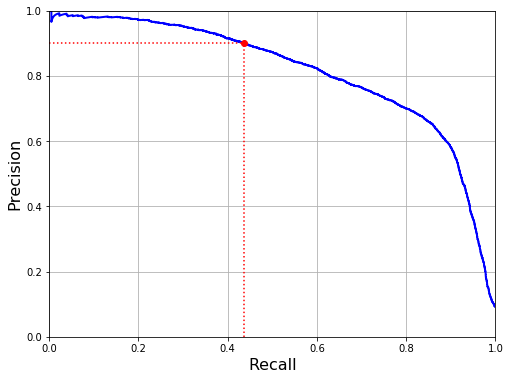

In [24]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

红线依旧代表90%精确率。在这张图中我们无法看出某个点对应的阈值，但我们可以找到较好的“精确率-召回率”组合，例如我们可以在看图后要求精确率在80%左右，召回率60%左右。

### (3) ROC曲线
接受者操作特征曲线(Receiver Operating Characteristic Curve, ROC曲线)是与二分类器一起使用的另一种常用工具。 它与精确度/召回率曲线非常相似，但是ROC曲线不是绘制精确度与召回率，而是绘制真阳性率（TPR，等同于召回率）与假阳性率（FPR）。

$FPR = \frac{FP}{FP + TN}$，即FPR为被预测是“非5”但实际是“5”占总的预测错误的比率。

要绘制ROC曲线，首先要使用roc_curve（）函数来计算各种阈值的TPR和FPR：

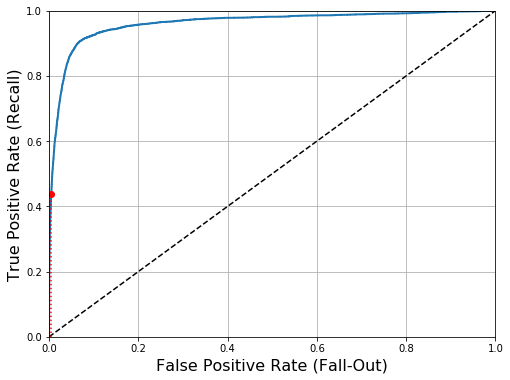

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.show()

TPR和FPR间也有权衡关系，若分类器是完全随机的，则ROC曲线应为图中的虚线（对角线），曲线下方的面积(AUC)为0.5；一个好的二分类器ROC曲线会尽可能地贴近左上角，曲线下方的面积接近1。我们可以用roc_auc_score()求曲线下方的面积：

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9611778893101814

我们再用随机森林对相同的数据进行训练，并求出AUC：

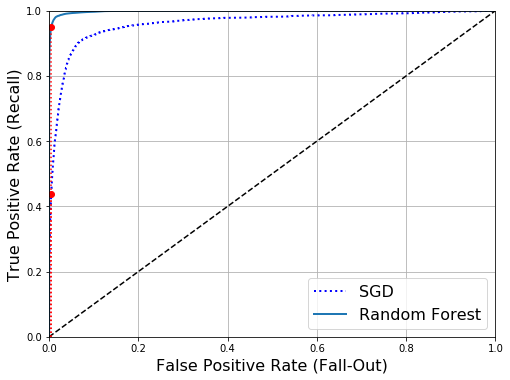

In [27]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [28]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

从AUC来看，随机森林的效果要比随机梯度下降好，我们也可以求出精确率和召回率：

In [29]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [30]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

同样的阈值，随机森林的精确率和召回率都比随机梯度下降高，我们可以考虑使用随机森林模型。

## 3.多类别、多标签、多输出分类
### (1) 多类别分类
我们用一个二分类器，只能将数据分为“5”和“非5”，如何把0-9完全分为10类呢？我们需要应用多类别分类(multiclass classification)。

一些算法（例如SGD分类器，Random Forest分类器和朴素贝叶斯分类器）能够本地处理多个类。其他（例如Logistic回归或支持向量机分类器SVC）是严格的二分类器。但是我们也可以利用二分类器实现多类别分类，我们有两种策略：**一对多**(one-versus-the-rest, OvR)和**一对一**(one-versus-one, OvO)。

OvR：训练10个二分类器，每个数字分类器各一个（“0”二分类器，“1”二分类器，...，“9”二分类器）。在对图像进行分类时，可以将其输入每个分类器中，获取10个决策得分，然后选择得分最高的类。

OvO：为每**对**数字训练一个二分类器：第一个用于区分0和1，第二个用于区分0和2，......如果利用OvO策略，如果有$N$个类，则需要训练$\frac{N \times (N + 1)}{2}$个分类器。我们的问题需要训练45个二分类器。当要对图像进行分类时，必须将其输入所有45个分类器，并查看哪一类的“赢”的次数最多。 OvO的主要优点是，每个分类器只需要针对必须区分的两个类别进行训练。

某些算法（例如SVC）随训练集的的规模变大而变差。对于这些算法OvO是首选的，因为在小型训练集上训练多个分类器比在大型训练集上训练几个分类器更快。但是，对于大多数分类算法OvR是首选。当我们尝试将二分类算法用于多分类任务时，sklearn会检测到，并根据算法自动运行OvR或OvO。

让我们使用SVC来进行多类别分类，sklearn会自动使用OvO策略 ：

In [31]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto", random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000]) # 这里fit的是y_train， 因为我们要将所有的数据分为10类
svm_clf.predict([some_digit])

array([5], dtype=uint8)

注意：这里的**[5]**代表some_digit被分到了**第6组**(因为第1组是“0”)，我们可以用svm_clf.classes_来查看组名。值得注意的是：在我们的例子中，类名的数组和0-9**恰好顺序相同**；当使用其他数据集时，不能单纯地认为[5]代表该数据被预测为“5”。

我们可以调出SVC对some_digit所有十类的决策评分：

In [32]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.92492871,  7.02307409,  3.93648529,  0.90117363,  5.96945908,
         9.5       ,  1.90718593,  8.02755089, -0.13202708,  4.94216947]])

可以看到，SVC给“5”评分最高，为9.5，因此SVC将some_digit预测为“5”。

我们也可以强行让SVC使用OvR策略进行分类：

In [33]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

SGD分类器不需要利用二分类器，而能直接将数据分为10个类：

In [34]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([5], dtype=uint8)

我们也可以看到SGD分类器给some_digit的决策评分：

In [35]:
sgd_clf.decision_function([some_digit])

array([[-15955.22627845, -38080.96296175, -13326.66694897,
           573.52692379, -17680.6846644 ,   2412.53175101,
        -25526.86498156, -12290.15704709,  -7946.05205023,
        -10631.35888549]])

我们也可以对其进行3折交叉验证，并用accuracy对其进行评价：

In [36]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.8489802 , 0.87129356, 0.86988048])

可以看出，SGD的准确率要在84%以上，要知道全随机的分类器在进行此任务时，准确率只在10%左右。

### (2) 多标签分类
假设我们想将所有的数据按以下标签分类：第一个标签指示数字是否很大（≥7），第二个指示数字是否为奇数。我们如何得到很大且是奇数的数据呢？

In [37]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

由于我们在分类时用了两个标签，我们接下来要进行的是多标签分类(multilabel classification)，我们使用K临近分类器(KNeighborsClassifier)来实现这一点：

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

knn_clf.predict([some_digit])

array([[False,  True]])

分类器输出了两个标签：False和True，这代表some_digit小于7且是奇数，因为some_digit实际上是5，所以分类器预测是正确的。

### (3) 多输出分类
多输出分类(multioutput classification在对于每一个标签进行分类时，可能有多个类别，因此其是多类别分类和多标签分类的综合。

假设我们要训练一个从图像中除去噪声的系统，其系统需要接受一有噪声的图片并输出一个去噪后的图片。同some_digit一样，这张图片由28×28维数组来表示，因此是多标签的(每个像素一个标签)，每个像素的值为0-255，因此是多类别的。

我们先在原数据集上增加噪音，创建训练集和测试集：

In [39]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

我们找一个图片来看一下加上噪声后的效果(左图)，右图为原始图像：

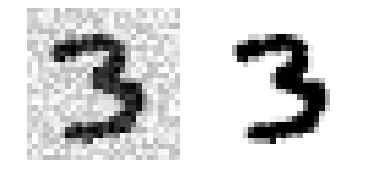

In [40]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,interpolation="nearest")
    plt.axis("off")

some_index = 500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])

plt.show()

接下来我们要使用K临近分类器来去除噪声：

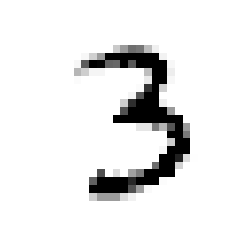

In [41]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)

可以看到除噪的效果不错，虽然去噪后的图像和原图不完全相同，但我们能看出这个数字是“3”。

## 4.混淆矩阵与误差分析

我们在第二节的末尾得到SGD的准确率在84%以上。如果我们将X进行适当的归一化和标准化，则能使准确率更高：

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

KeyboardInterrupt: 

接下来，我们对分类器错误的判断进行分析，我们要利用到混淆矩阵：

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

我们利用matshow()对其进行可视化：

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

大多数对角块是非常偏白色的，这说明大多数的数据都被正确地分类了。为了找到错分类的数据情况，我们需要将混淆矩阵中每一个元素除以其所属类(行)的数据总数，再将对角线都设为黑色(因为对角线的元素一定被正确地分类)，这样我们便能比较每个类的错误率：

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

“8”这一列很亮，尤其是其与“2”、“5”、“9”三行的交点，这表示很多的“2”、“5”、“9”被误归类为“8”(注意：列指的是“被归类”的数量)。但是“8”这一行比较暗，因此真正的“8”被分错类的很少。我们可以尝试收集更多关于看起来像“8”但不是的数据进行训练；或者在数据集里加入有助于对“8”进行分类的特征，如闭环的数量(“8”有2个，“9”有1个，“2”有0个)；或者可以预处理图像以使图像的某些特征(如闭环)更加突出。

## 参考资料：
* “Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd edition”  作者：Aurélien Géron
